In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from bokeh.plotting import figure, output_file, show
from bokeh.io import export_png
from bokeh.io.export import get_screenshot_as_png
import geopandas
import matplotlib as mpl

In [2]:
tweets = pd.read_csv('../TP1-Organizacion-de-Datos/csv/train.csv')

In [3]:
tweets.sample(n = 5)

,id,keyword,location,text,target
4322,6137,hijack,Innerhalb der LÌ_cke,#GamerGate 'Our entire attempt to hijack your ...,0
3036,4357,earthquake,Desde Republica Argentina,#Sismo ML 2.4 NEAR THE COAST OF WESTERN TURKE...,1
6355,9085,structural%20failure,Reality,'Jet fuel cant melt steel'\n'The structural fa...,1
5246,7502,oil%20spill,Amarillo,'California: Spring Oil Spill Estimate Grows '...,1
6319,9031,stretcher,NaN,Lately I've been under pressure make me wanna ...,0


In [4]:
ciudades = pd.read_csv('../TP1-Organizacion-de-Datos/csv/worldcities.csv')

In [5]:
ciudades.sample(n = 5)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
12559,Paw Paw,Paw Paw,42.2146,-85.8918,United States,US,USA,Michigan,NaN,8400.0,1840011208
13154,Orange City,Orange City,43.0021,-96.0567,United States,US,USA,Iowa,NaN,6997.0,1840009044
396,Vila Velha,Vila Velha,3.2167,-51.2167,Brazil,BR,BRA,Amapá,NaN,1209091.0,1076575691
5204,Iqaluit,Iqaluit,63.7505,-68.5002,Canada,CA,CAN,Nunavut,admin,6124.0,1124379539
10772,Pineville,Pineville,31.3414,-92.4096,United States,US,USA,Louisiana,NaN,14429.0,1840014963


In [6]:
tweets['location'].isnull().sum()

2533

In [7]:
tweets['location'].isnull().mean()

0.33272034677525286

In [8]:
location_list = tweets['location'].tolist()

In [9]:
ciudades_ocurr = tweets['location'].value_counts()

In [10]:
ciudades_ocurr

USA                             104
New York                         71
United States                    50
London                           45
Canada                           29
                               ... 
West Richland, WA                 1
North Memphis/Global Citizen      1
Tucson, Az                        1
Missouri, USA                     1
Fukuoka, Japan                    1
Name: location, Length: 3341, dtype: int64

In [11]:
ciudades_list = ciudades['city_ascii']
ciudades_list = pd.DataFrame(ciudades_list)

In [12]:
ciudades_list['ocurrencia'] = 0

In [13]:
ciudades_list

,city_ascii,ocurrencia
0,Tokyo,0
1,New York,0
2,Mexico City,0
3,Mumbai,0
4,Sao Paulo,0
...,...,...
15488,Timmiarmiut,0
15489,Cheremoshna,0
15490,Ambarchik,0
15491,Nordvik,0


In [14]:
ciudades_list.shape

(15493, 2)

In [15]:
ciudades_list['city_ascii'].count()

15493

In [16]:
ciudades_list['veracidad'] = 0
ciudades_list['cant_verdaderos'] = 0

In [17]:
ciudades_list['veracidad'] = ciudades_list['veracidad'].astype(float)

In [18]:
ciudades_list.dtypes

city_ascii          object
ocurrencia           int64
veracidad          float64
cant_verdaderos      int64
dtype: object

In [19]:
tienenLaCiudad = pd.DataFrame(columns=('tweetDeLaCiudad', 'V/F'))
tienenLaCiudad['V/F'] = tweets['target']

Comparo cada ciudad del mundo con los tweets y busco si el nombre de la ciudad esta incluido en el campo "Location" de cada Tweet

In [20]:
#CUIDADO AL EJECUTAR ESTO xD
for x in range(ciudades_list['city_ascii'].count()):
    ciudad = ciudades_list.loc[x, 'city_ascii']
    if (len(ciudad) > 4):
        tienenLaCiudad['tweetDeLaCiudad'] = tweets.loc[:, 'location'].str.contains(ciudad, regex = False)
    else:
        tienenLaCiudad['tweetDeLaCiudad'] = (tweets.loc[:, 'location'] == ciudad)
        
    cant_tweets = tienenLaCiudad[tienenLaCiudad['tweetDeLaCiudad'] == True]['tweetDeLaCiudad'].count()
    verdaderos = tienenLaCiudad[(tienenLaCiudad['V/F'] == 1) & (tienenLaCiudad['tweetDeLaCiudad'] == True)]['V/F'].count()
    
    ciudades_list.loc[x, 'cant_verdaderos'] = verdaderos
    ciudades_list.loc[x, 'ocurrencia'] = cant_tweets
    if (cant_tweets != 0):
        ciudades_list.loc[x, 'veracidad'] = float(verdaderos)/float(cant_tweets)

In [21]:
ciudades_list

,city_ascii,ocurrencia,veracidad,cant_verdaderos
0,Tokyo,8,0.500000,4
1,New York,131,0.320611,42
2,Mexico City,1,0.000000,0
3,Mumbai,31,0.838710,26
4,Sao Paulo,2,0.500000,1
...,...,...,...,...
15488,Timmiarmiut,0,0.000000,0
15489,Cheremoshna,0,0.000000,0
15490,Ambarchik,0,0.000000,0
15491,Nordvik,0,0.000000,0


In [22]:
Ciudades_Mas_10_Tweets = (ciudades_list.loc[:,'ocurrencia'] > 10)

In [23]:
Top_populares = ciudades_list.loc[Ciudades_Mas_10_Tweets]

In [24]:
Top_populares = Top_populares.sort_values('ocurrencia', ascending = False)

In [25]:
Top_populares = Top_populares.drop_duplicates(['city_ascii'])

In [26]:
Top_populares

,city_ascii,ocurrencia,veracidad,cant_verdaderos
1,New York,131,0.320611,42
1388,London,108,0.342593,37
13458,California,77,0.519481,40
10449,Washington,67,0.626866,42
2638,Los Angeles,53,0.358491,19
24,Chicago,45,0.444444,20
4296,Florida,35,0.371429,13
7676,San Francisco,33,0.545455,18
3,Mumbai,31,0.838710,26
14904,Atlanta,30,0.366667,11


Text(0.5, 1.0, 'Ciudades con mayor cantidad de Tweets')

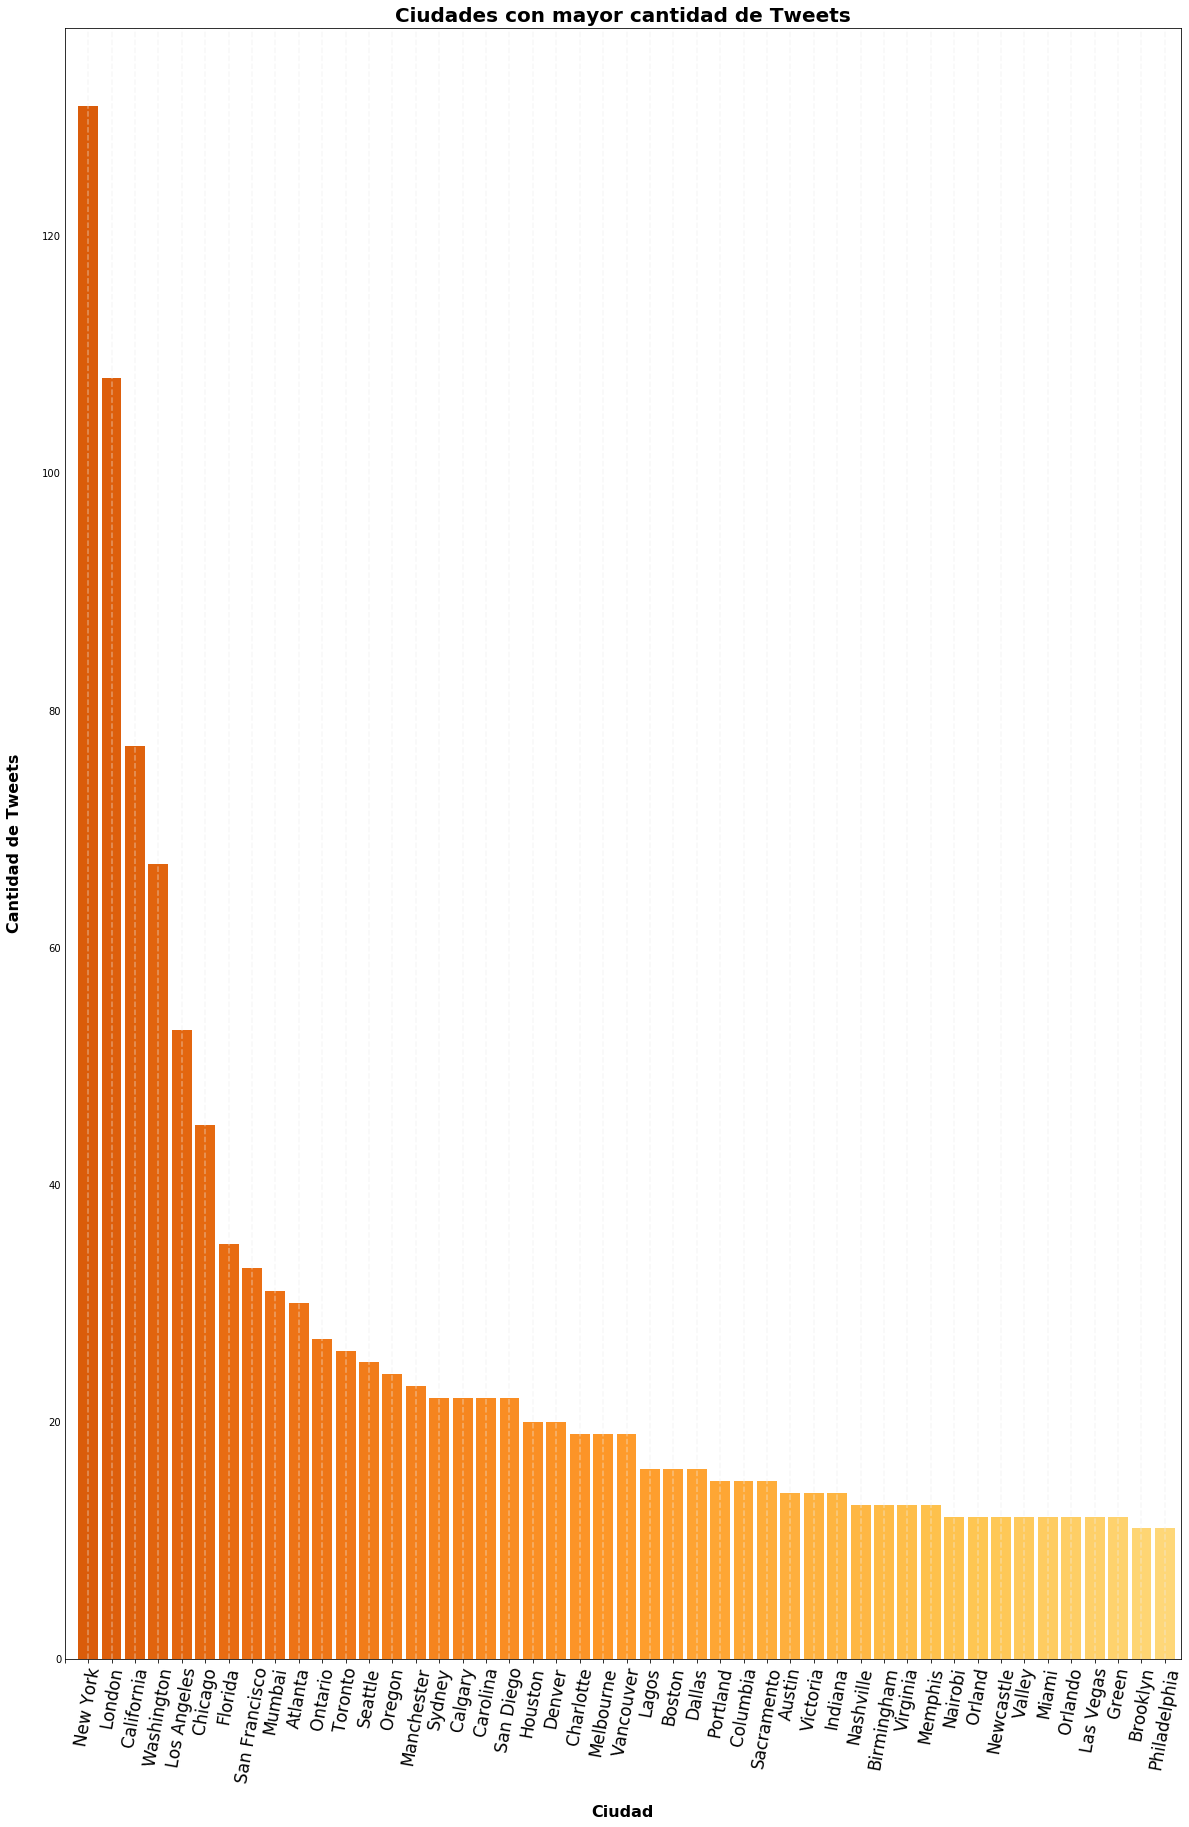

In [27]:
saltos = np.linspace(0.3, 0.7, 48)
colores = (cm.get_cmap('YlOrBr'))(saltos)
Top_populares = Top_populares.sort_values('ocurrencia')
Top_populares_plot = Top_populares.plot(kind='bar', y ='ocurrencia', x = 'city_ascii', figsize=(20, 30), color=colores, width=0.85, legend=False)

plt.xticks(np.arange(0, 48, 1.0), fontsize = 17, rotation = 80)
plt.tick_params(axis='y', length=0)

#Top_populares_plot.spines['right'].set_visible(False)
#Top_populares_plot.spines['top'].set_visible(False)
#Top_populares_plot.spines['left'].set_visible(False)
#Top_populares_plot.spines['bottom'].set_visible(False)

lineas = Top_populares_plot.get_xticks()
for i in lineas:
      Top_populares_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
    
plt.gca().invert_xaxis()

Top_populares_plot.set_xlabel("Ciudad", labelpad=20, weight='bold', size=16)
Top_populares_plot.set_ylabel("Cantidad de Tweets", labelpad=20, weight='bold', size=16)
Top_populares_plot.set_title("Ciudades con mayor cantidad de Tweets", weight='bold', size=20)

Text(0.5, 1.0, 'Veracidad promedio de los Tweets por ciudad')

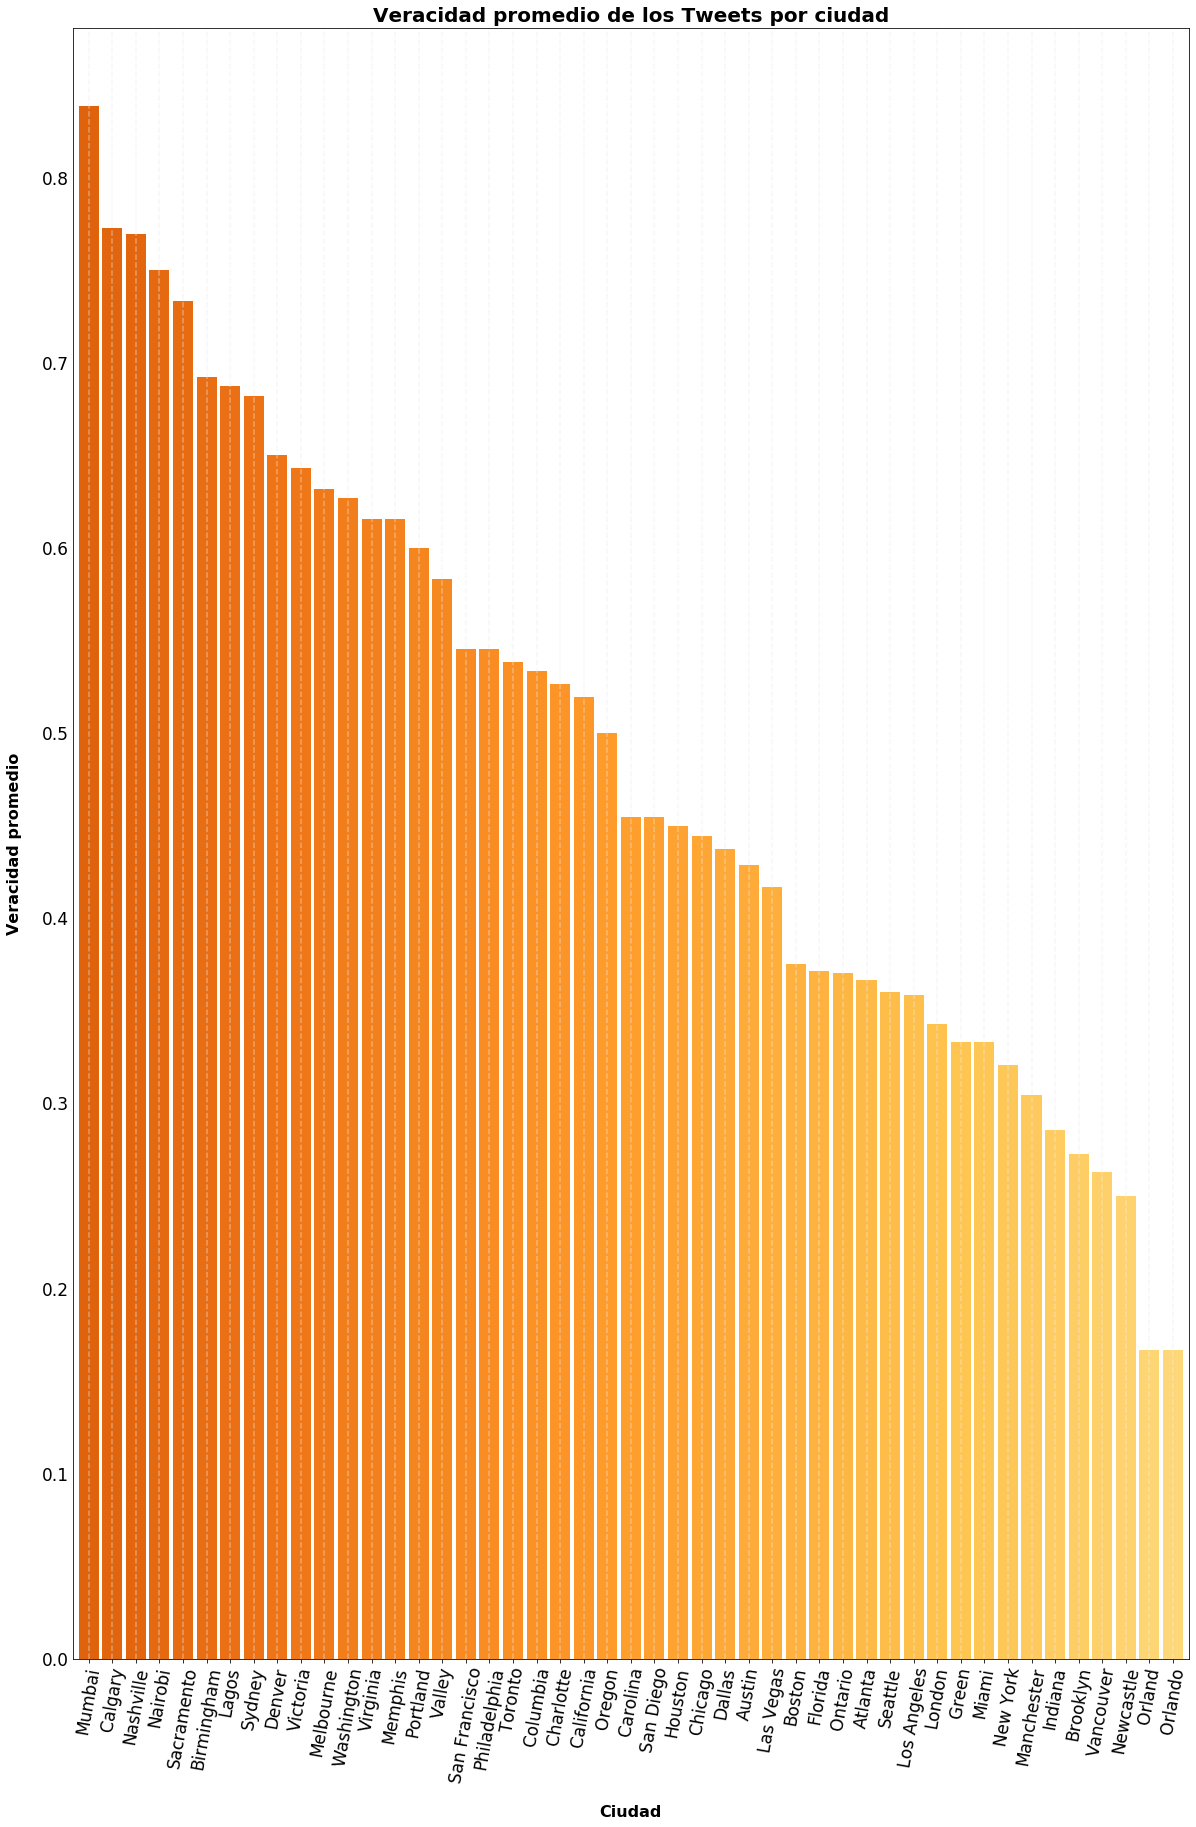

In [28]:
saltos = np.linspace(0.3, 0.7, 50)
colores = (cm.get_cmap('YlOrBr'))(saltos)
Top_populares = Top_populares.sort_values('veracidad')
Top_populares_plot = Top_populares.plot(kind='bar', y ='veracidad', x = 'city_ascii', figsize=(20, 30), color=colores, width=0.85, legend = False)

plt.xticks(np.arange(0, 47, 1), rotation = 80, fontsize = 17)
plt.yticks(fontsize = 17)
plt.tick_params(axis='y', length=0)

#Top_populares_plot.spines['right'].set_visible(False)
#Top_populares_plot.spines['top'].set_visible(False)
#Top_populares_plot.spines['left'].set_visible(False)
#Top_populares_plot.spines['bottom'].set_visible(False)

lineas = Top_populares_plot.get_xticks()
for i in lineas:
      Top_populares_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')

plt.gca().invert_xaxis()
        
Top_populares_plot.set_xlabel("Ciudad", labelpad=20, weight='bold', size=16)
Top_populares_plot.set_ylabel("Veracidad promedio", labelpad=20, weight='bold', size=16)
Top_populares_plot.set_title("Veracidad promedio de los Tweets por ciudad", weight='bold', size=20)

In [29]:
ciudades_list['Pais'] = ciudades['country']

In [30]:
ciudades_list

,city_ascii,ocurrencia,veracidad,cant_verdaderos,Pais
0,Tokyo,8,0.500000,4,Japan
1,New York,131,0.320611,42,United States
2,Mexico City,1,0.000000,0,Mexico
3,Mumbai,31,0.838710,26,India
4,Sao Paulo,2,0.500000,1,Brazil
...,...,...,...,...,...
15488,Timmiarmiut,0,0.000000,0,Greenland
15489,Cheremoshna,0,0.000000,0,Ukraine
15490,Ambarchik,0,0.000000,0,Russia
15491,Nordvik,0,0.000000,0,Russia


In [31]:
ciudades_list = ciudades_list.drop_duplicates('city_ascii', keep = 'first')

In [32]:
ciudades_list.shape

(13482, 5)

In [33]:
Tweets_Paises = pd.DataFrame({'Cantidad_Tweets': 0, 'Pais': ciudades['country'], 'Veracidad': 0, 'Cantidad_Tweets_Verdaderos': 0})

In [34]:
Tweets_Paises['Veracidad'] = Tweets_Paises['Veracidad'].astype(float)

In [35]:
Tweets_Paises['Pais'].describe()

count             15493
unique              223
top       United States
freq               7328
Name: Pais, dtype: object

In [36]:
Tweets_Paises = Tweets_Paises.drop_duplicates(['Pais'])
Tweets_Paises = Tweets_Paises.reset_index(drop = True)

In [37]:
Tweets_Paises.dtypes

Cantidad_Tweets                 int64
Pais                           object
Veracidad                     float64
Cantidad_Tweets_Verdaderos      int64
dtype: object

In [38]:
ciudades_list.dtypes

city_ascii          object
ocurrencia           int64
veracidad          float64
cant_verdaderos      int64
Pais                object
dtype: object

In [39]:
ciudades_list

,city_ascii,ocurrencia,veracidad,cant_verdaderos,Pais
0,Tokyo,8,0.500000,4,Japan
1,New York,131,0.320611,42,United States
2,Mexico City,1,0.000000,0,Mexico
3,Mumbai,31,0.838710,26,India
4,Sao Paulo,2,0.500000,1,Brazil
...,...,...,...,...,...
15488,Timmiarmiut,0,0.000000,0,Greenland
15489,Cheremoshna,0,0.000000,0,Ukraine
15490,Ambarchik,0,0.000000,0,Russia
15491,Nordvik,0,0.000000,0,Russia


In [40]:
#CUIDADO AL EJECUTAR ESTO xD
for w in range(Tweets_Paises['Pais'].count()):
    
    pais = Tweets_Paises.loc[w, 'Pais']
    
    la_ciudad_es_del_pais = (ciudades_list.loc[:, 'Pais'] == pais)
    
    ciudades_del_pais = ciudades_list.loc[la_ciudad_es_del_pais]
    
    total_tweets_pais = ciudades_del_pais['ocurrencia'].sum()

    total_tweets_verdaderos_pais = ciudades_del_pais['cant_verdaderos'].sum()
    
    Tweets_Paises.loc[w, 'Cantidad_Tweets'] = total_tweets_pais
    
    Tweets_Paises.loc[w, 'Cantidad_Tweets_Verdaderos'] = total_tweets_verdaderos_pais
    
    if (total_tweets_pais != 0):
        
        Tweets_Paises.loc[w, 'Veracidad'] = float(total_tweets_verdaderos_pais)/float(total_tweets_pais)

In [41]:
Tweets_Paises

,Cantidad_Tweets,Pais,Veracidad,Cantidad_Tweets_Verdaderos
0,13,Japan,0.538462,7
1,1906,United States,0.440189,839
2,8,Mexico,0.500000,4
3,75,India,0.693333,52
4,16,Brazil,0.312500,5
...,...,...,...,...
218,0,Turks And Caicos Islands,0.000000,0
219,0,Cayman Islands,0.000000,0
220,0,Cook Islands,0.000000,0
221,0,Falkland Islands (Islas Malvinas),0.000000,0


In [42]:
Tweets_Paises['Cantidad_Tweets'].sum()

2935

In [43]:
paises_mas_10_tweets = (Tweets_Paises.loc[:,'Cantidad_Tweets'] > 10)

In [44]:
paises_mas_10_tweets = Tweets_Paises.loc[paises_mas_10_tweets]

In [45]:
paises_mas_10_tweets = paises_mas_10_tweets.sort_values('Cantidad_Tweets')

Text(0.5, 1.0, 'Paises con mayor cantidad de Tweets')

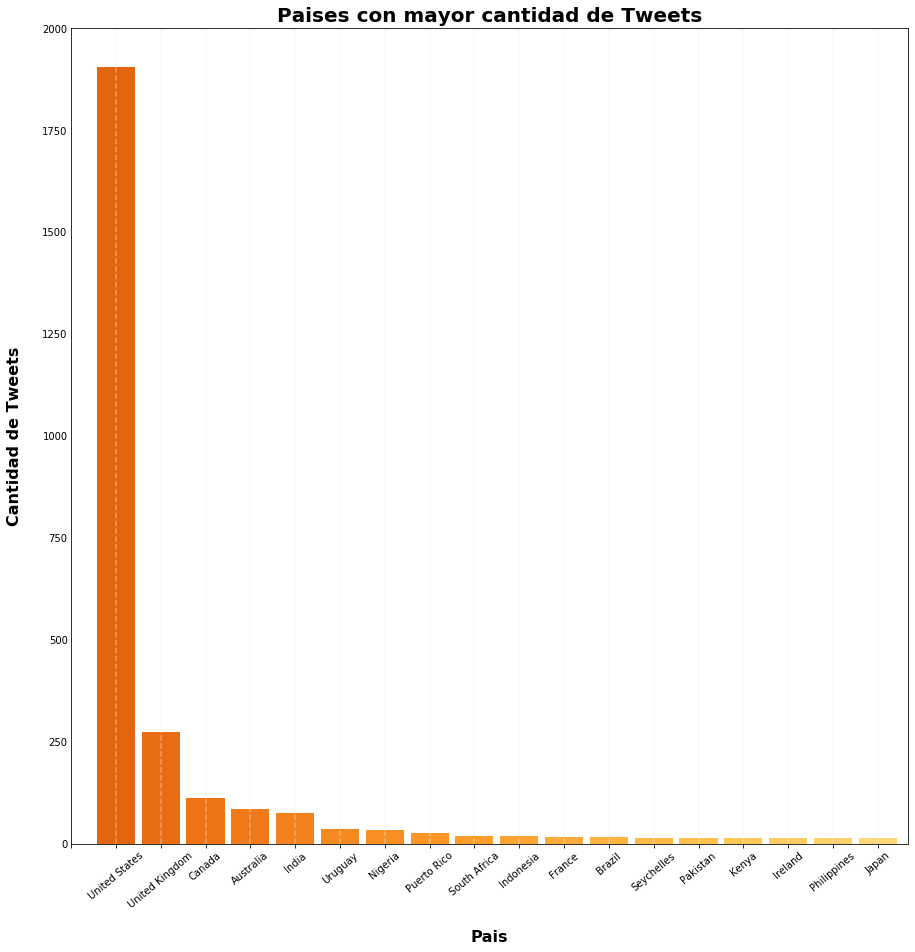

In [46]:
saltos = np.linspace(0.3, 0.7, 20)
colores = (cm.get_cmap('YlOrBr'))(saltos)

paises_mas_10_tweets_plot = paises_mas_10_tweets.plot(kind='bar', y ='Cantidad_Tweets', x = 'Pais', figsize=(15, 15), color=colores, width=0.85, legend = False)

plt.xticks(np.arange(0, 19, 1.0))
plt.tick_params(axis='y', length=0)

#paises_mas_10_tweets_plot.spines['right'].set_visible(False)
#paises_mas_10_tweets_plot.spines['top'].set_visible(False)
#paises_mas_10_tweets_plot.spines['left'].set_visible(False)
#paises_mas_10_tweets_plot.spines['bottom'].set_visible(False)

lineas = paises_mas_10_tweets_plot.get_xticks()
for i in lineas:
      paises_mas_10_tweets_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
plt.xticks(fontsize = 10, rotation = 40)
plt.yticks(fontsize = 10)

plt.gca().invert_xaxis()

paises_mas_10_tweets_plot.set_xlabel("Pais", labelpad=20, weight='bold', size=16)
paises_mas_10_tweets_plot.set_ylabel("Cantidad de Tweets", labelpad=20, weight='bold', size=16)
paises_mas_10_tweets_plot.set_title("Paises con mayor cantidad de Tweets", weight='bold', size=20)

Text(0.5, 1.0, 'Veracidad promedio de los Tweets por pais')

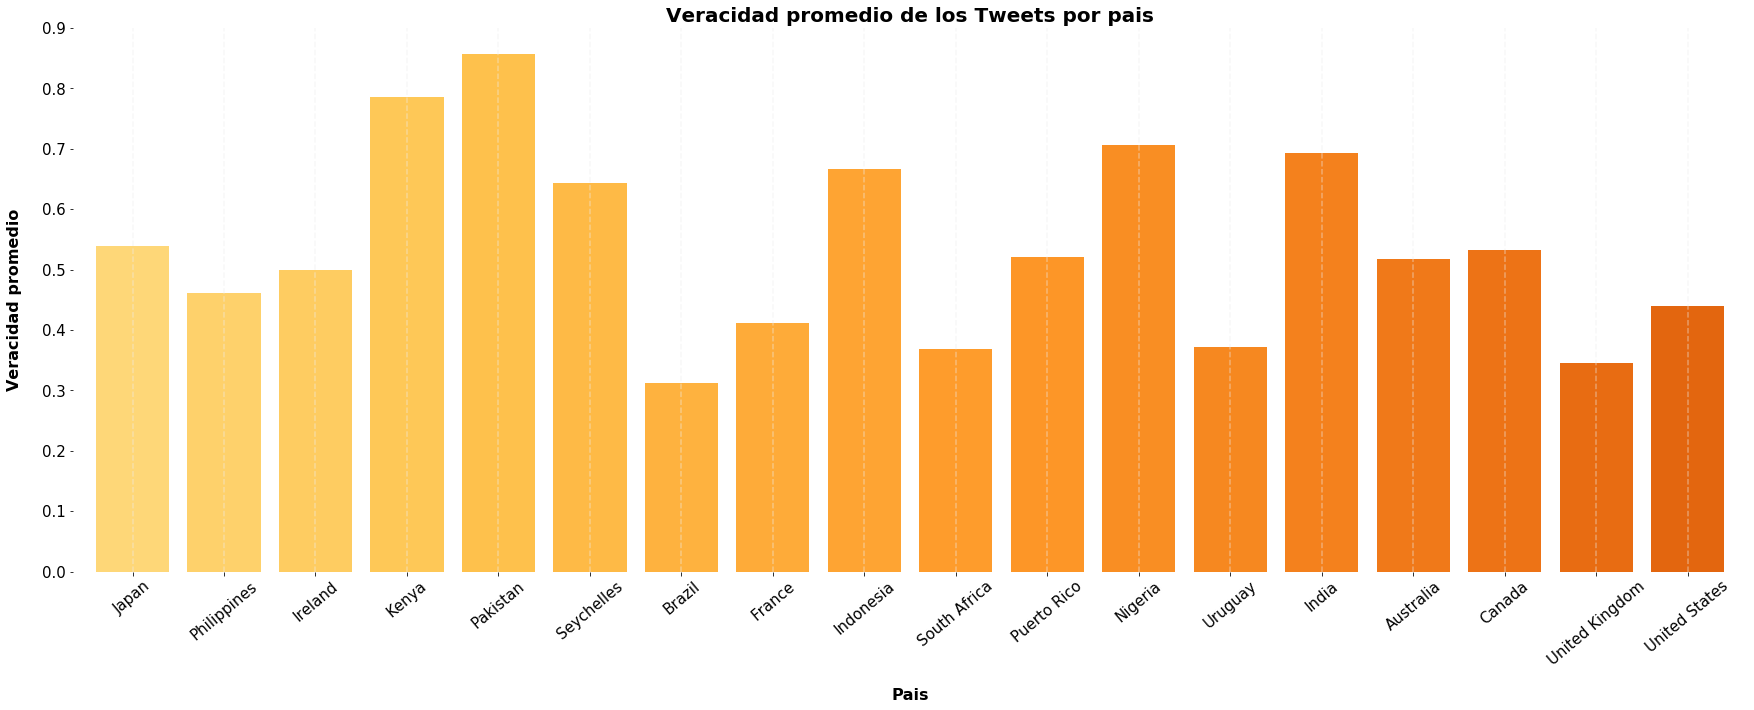

In [47]:
saltos = np.linspace(0.3, 0.7, 20)
colores = (cm.get_cmap('YlOrBr'))(saltos)

paises_mas_10_tweets_plot = paises_mas_10_tweets.plot(kind='bar', y ='Veracidad', x = 'Pais', figsize=(30,10), color=colores, width=0.80, legend = False)

paises_mas_10_tweets_plot.spines['right'].set_visible(False)
paises_mas_10_tweets_plot.spines['top'].set_visible(False)
paises_mas_10_tweets_plot.spines['left'].set_visible(False)
paises_mas_10_tweets_plot.spines['bottom'].set_visible(False)

lineas = paises_mas_10_tweets_plot.get_xticks()
for i in lineas:
      paises_mas_10_tweets_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
             
plt.xticks(fontsize = 15, rotation = 40)
plt.yticks(fontsize = 15)

paises_mas_10_tweets_plot.set_xlabel("Pais", labelpad=20, weight='bold', size=16)
paises_mas_10_tweets_plot.set_ylabel("Veracidad promedio", labelpad=20, weight='bold', size=16)
paises_mas_10_tweets_plot.set_title("Veracidad promedio de los Tweets por pais", weight='bold', size=20)

Veracidad de los tweets cuando la locacion es "valida"

In [48]:
Tweets_Location_Valida = Tweets_Paises['Cantidad_Tweets'].sum()
Tweets_Location_Valida

2935

In [49]:
Tweets_Location_Valida_Verdaderos  = Tweets_Paises['Cantidad_Tweets_Verdaderos'].sum()
Tweets_Location_Valida_Verdaderos

1334

In [50]:
float(Tweets_Paises['Cantidad_Tweets_Verdaderos'].sum())/float(Tweets_Paises['Cantidad_Tweets'].sum())

0.4545144804088586

------------------------------------------------------------------------------------------------------------------

In [51]:
Tweets_Location_Invalida_Verdaderos = (tweets['target'].sum() - Tweets_Paises['Cantidad_Tweets_Verdaderos'].sum())
Tweets_Location_Invalida_Verdaderos

1937

In [52]:
Tweets_Location_Invalida = (tweets['id'].count() - Tweets_Paises['Cantidad_Tweets'].sum())
Tweets_Location_Invalida

4678

In [53]:
float(Tweets_Location_Invalida_Verdaderos)/float(Tweets_Location_Invalida)

0.41406584010260794

In [54]:
cantidad_segun_validez = (Tweets_Location_Valida, Tweets_Location_Invalida)

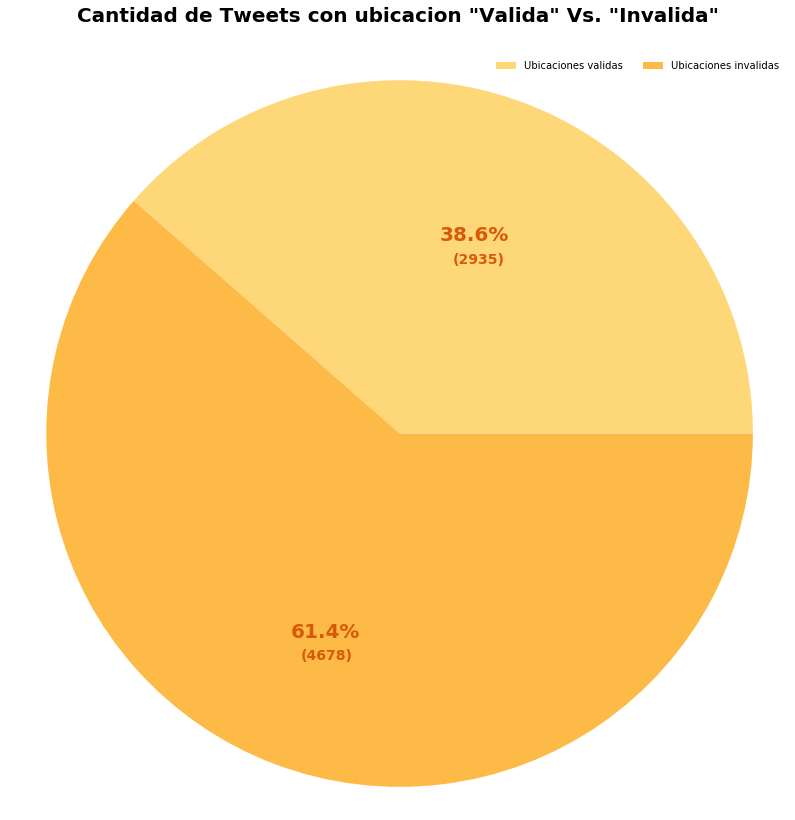

In [55]:
cmap = cm.get_cmap('YlOrBr')
saltos = np.linspace(0.3, 0.7, 20)
colores = cmap(saltos)

plt.figure(figsize=(14,14))
pie_chart = plt.subplot()


a,b, autotexts = pie_chart.pie(cantidad_segun_validez, colors= [colores[0], colores[5]], autopct='%1.1f%%')

for autotext in autotexts:
    autotext.set_color(color=colores[19])
    autotext.set_fontsize(20)
    autotext.set_fontweight('bold')


pie_chart.text(0.15, 0.48, '(' + str(cantidad_segun_validez[0])+')', color=colores[19], fontweight='bold', fontsize=14)
pie_chart.text(-0.28, -0.64, '(' +str(cantidad_segun_validez[1])+')', color=colores[19], fontweight='bold', fontsize=14) 
pie_chart.legend(["Ubicaciones validas", "Ubicaciones invalidas"], frameon=False, loc='best', ncol=2)
plt.title('Cantidad de Tweets con ubicacion "Valida" Vs. "Invalida"', weight='bold', size=20, pad=30)
plt.axis('equal')
plt.show()

Cuando la location es invalida hay una ligera diferencia entre la veracidad de los Tweets

In [56]:
ciudades_list = ciudades_list.reset_index(drop = True)

In [57]:
ciudades = ciudades.drop_duplicates('city_ascii', keep = 'first')

In [58]:
ciudades = ciudades.reset_index(drop = True) # A ciudades_list ya le habia hecho el drop_duplicates antes.

In [59]:
ciudades_list['cant_habitantes'] = ciudades['population']

In [60]:
ciudades_list

,city_ascii,ocurrencia,veracidad,cant_verdaderos,Pais,cant_habitantes
0,Tokyo,8,0.500000,4,Japan,35676000.0
1,New York,131,0.320611,42,United States,19354922.0
2,Mexico City,1,0.000000,0,Mexico,19028000.0
3,Mumbai,31,0.838710,26,India,18978000.0
4,Sao Paulo,2,0.500000,1,Brazil,18845000.0
...,...,...,...,...,...,...
13477,Timmiarmiut,0,0.000000,0,Greenland,10.0
13478,Cheremoshna,0,0.000000,0,Ukraine,0.0
13479,Ambarchik,0,0.000000,0,Russia,0.0
13480,Nordvik,0,0.000000,0,Russia,0.0


In [61]:
Ciudades_Mas_De_5_Tweets = (ciudades_list.loc[:,'ocurrencia'] > 5)

In [62]:
cmap = cm.get_cmap('YlOrBr')
paleta = cmap(np.linspace(0.3, 0.9,100))

colores_rgb = []
for i in paleta:
    #convierto rgba en rgb
    aux = list(i)
    del aux[3]
    aux = (int(x * 255) for x in aux)
    aux =tuple(aux)
    colores_rgb.append((aux))

In [63]:
type(colores_rgb)

list

In [64]:
# prepare some data
x = ciudades_list.loc[Ciudades_Mas_De_5_Tweets]['veracidad']
y = ciudades_list.loc[Ciudades_Mas_De_5_Tweets]['ocurrencia']
radii = np.sqrt(ciudades_list.loc[Ciudades_Mas_De_5_Tweets]['cant_habitantes'])/7e4
colors = [
    "#%02x%02x%02x" % i for i in colores_rgb
]

# output to static HTML file (with CDN resources)
output_file("Veracidad_Vs_Cantidad de Tweets.html", title="color_scatter.py example", mode="cdn")

TOOLS = "crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select, save"

# create a new plot with the tools above, and explicit ranges
p = figure(tools=TOOLS, x_range=(0, 1), y_range=(0, 150), width=1000, height=1000)

# add a circle renderer with vectorized colors and sizes
p.circle(x, y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)

p.title.text = "Veracidad Vs. Cantidad de Tweets (Por ciudad)"
p.legend.location = "top"
p.xaxis.axis_label = 'Veracidad promedio'
p.yaxis.axis_label = 'Cantidad de Tweets'

# show the results
show(p)

/home/riedel/anaconda3/lib/python3.7/site-packages/bokeh/models/plots.py:767: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)


In [65]:
# prepare some data
x = ciudades_list.loc[Ciudades_Mas_De_5_Tweets]['veracidad']
y = ciudades_list.loc[Ciudades_Mas_De_5_Tweets]['cant_habitantes']/1e5
radii = np.sqrt(ciudades_list.loc[Ciudades_Mas_De_5_Tweets]['ocurrencia'])/1e2
# output to static HTML file (with CDN resources)
output_file("Veracidad_Vs_Cantidad de Habitantes.html", title="color_scatter.py example", mode="cdn")

TOOLS = "crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select, save"

# create a new plot with the tools above, and explicit ranges
q = figure(tools=TOOLS, x_range=(0, 1), y_range=(0, 150), width=800, height=1000)

# add a circle renderer with vectorized colors and sizes
q.circle(x, y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)

q.title.text = "Veracidad Vs. Cantidad de Habitantes (Por ciudad)"
q.legend.location = "top"
q.xaxis.axis_label = 'Veracidad promedio'
q.yaxis.axis_label = 'Cantidad de Habitantes (x1e5)'

# show the results
show(q)

/home/riedel/anaconda3/lib/python3.7/site-packages/bokeh/models/plots.py:767: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)


In [66]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [67]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [68]:
world.count()

pop_est       177
continent     177
name          177
iso_a3        177
gdp_md_est    177
geometry      177
dtype: int64

In [69]:
iso3 = pd.DataFrame({'iso3': ciudades['iso3']})
iso3 = iso3.drop_duplicates('iso3', keep = 'first')
iso3 = iso3.reset_index(drop = True)
Tweets_Paises['iso3']=iso3['iso3']

In [70]:
#CUIDADO AL EJECUTAR ESTO 
for w in range(world['name'].count()):
    
    code_pais = world.loc[w, 'iso_a3']
    
    el_code_es_del_pais = Tweets_Paises.loc[:, 'iso3'] == code_pais
    
    codigo_del_pais = Tweets_Paises.loc[el_code_es_del_pais]
    
    world.loc[w, 'veracidad'] = np.nan
    
    if codigo_del_pais['Cantidad_Tweets'].sum() > 5:
        
        world.loc[w, 'veracidad'] = codigo_del_pais['Veracidad'].sum()

In [71]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,veracidad
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0.531532
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.440189
...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN


In [72]:
#CUIDADO AL EJECUTAR ESTO
for z in range(world['name'].count()):
    
    code_pais = world.loc[z, 'iso_a3']
    
    el_code_es_del_pais = Tweets_Paises.loc[:, 'iso3'] == code_pais
    
    codigo_del_pais = Tweets_Paises.loc[el_code_es_del_pais]
    
    world.loc[z, 'veracidad'] = np.nan
    
    if codigo_del_pais['Cantidad_Tweets'].sum() > 5:
        
        world.loc[z, 'Cantidad_Tweets'] = np.log2(codigo_del_pais['Cantidad_Tweets'].sum())

In [73]:
#CUIDADO AL EJECUTAR ESTO 
for w in range(world['name'].count()):
    
    code_pais = world.loc[w, 'iso_a3']
    
    el_code_es_del_pais = Tweets_Paises.loc[:, 'iso3'] == code_pais
    
    codigo_del_pais = Tweets_Paises.loc[el_code_es_del_pais]
    
    world.loc[w, 'veracidad'] = np.nan
    
    if codigo_del_pais['Cantidad_Tweets'].sum() > 1:
        
        world.loc[w, 'veracidad'] = codigo_del_pais['Veracidad'].sum()

In [74]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,veracidad,Cantidad_Tweets
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0.531532,6.794416
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.440189,10.896332
...,...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN,NaN
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN


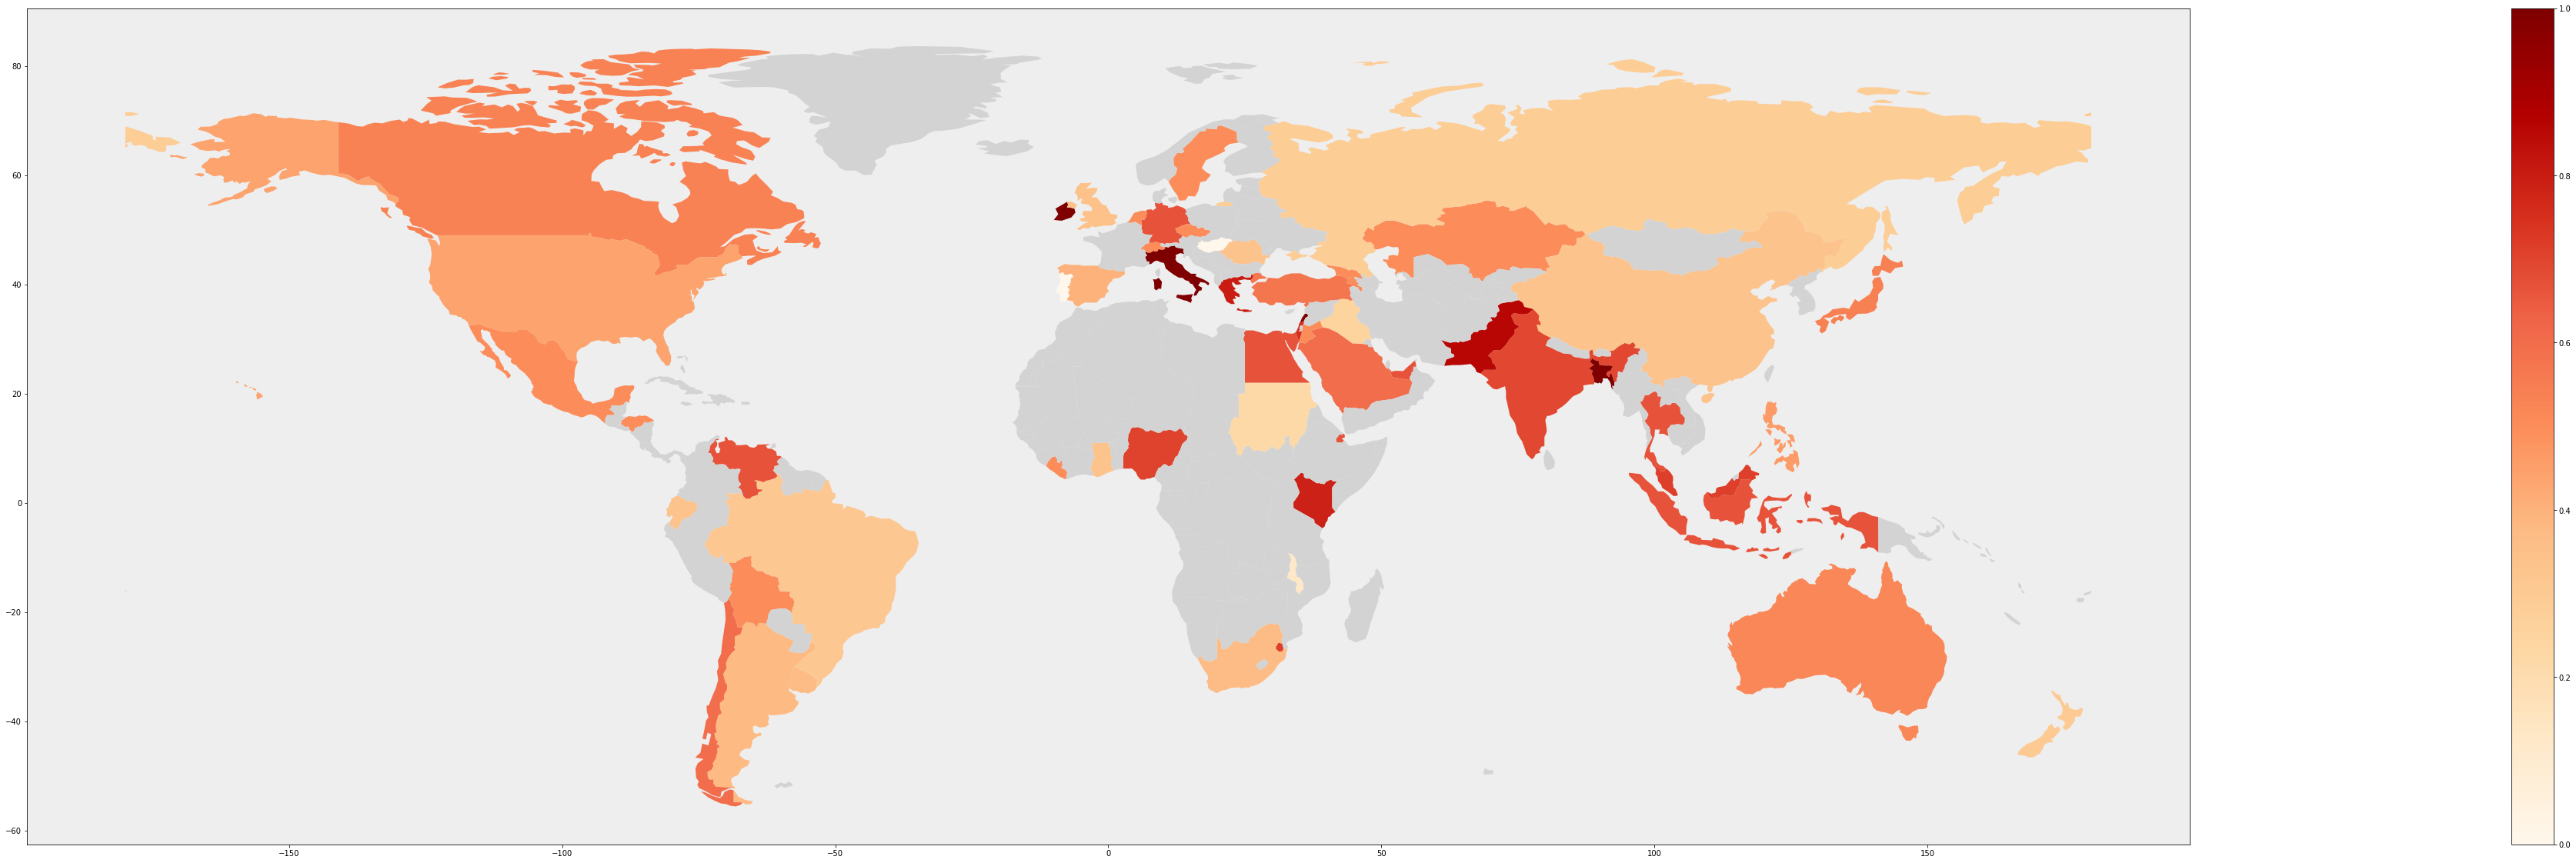

In [75]:
fig, ax = plt.subplots(figsize = (150, 20))
saltos = np.linspace(0.2, 1, 100)
cmap(saltos)
world = world[world.name!="Antarctica"]

ax.patch.set_facecolor('#eeeeee')
world.plot(column='veracidad', ax = ax, legend = True, cmap='OrRd', missing_kwds={'color': 'lightgrey'})

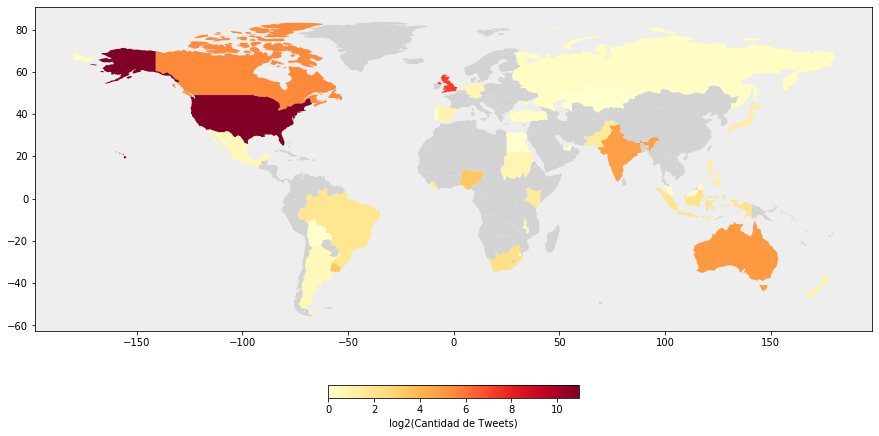

In [76]:
fig, ax = plt.subplots(figsize = (15, 20))
world = world[world.name!="Antarctica"]
ax.patch.set_facecolor('#eeeeee')
topes = mpl.colors.Normalize(vmin=0, vmax=np.log2(2000))
plt.colorbar(cm.ScalarMappable(norm=topes, cmap=cm.get_cmap("YlOrRd")), label='log2(Cantidad de Tweets)', \
             orientation='horizontal', shrink=0.3, pad=0.05)
world.plot(column='Cantidad_Tweets', ax = ax, cmap='YlOrRd', missing_kwds={'color': 'lightgrey'})
